# REDES NEURONALES

---



## Introducción



En esta actividad vamos a utilizar una red neuronal para clasificar imágenes de prendas de ropa. Para ello, utilizaremos Keras con TensorFlow.

El dataset a utilizar es Fashion MNIST, un problema sencillo con imágenes pequeñas de ropa, pero más interesante que el dataset de MNIST. Puedes consultar más información sobre el dataset en [este enlace](https://github.com/zalandoresearch/fashion-mnist).

El código utilizado para contestar tiene que quedar claramente reflejado en el Notebook. Puedes crear nuevas celdas si así lo deseas para estructurar tu código y sus salidas. A la hora de entregar el notebook, **asegúrate de que los resultados de ejecutar tu código han quedado guardados**. Por ejemplo, a la hora de entrenar una red neuronal tiene que verse claramente un log de los resultados de cada epoch.

In [29]:
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from keras import initializers
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

En primer lugar vamos a importar el dataset Fashion MNIST (recordad que este es uno de los dataset de entranamiento que estan guardados en keras) que es el que vamos a utilizar en esta actividad:

In [2]:
mnist = fashion_mnist

Llamar a **load_data** en este dataset nos dará dos conjuntos de dos listas, estos serán los valores de entrenamiento y prueba para los gráficos que contienen las prendas de vestir y sus etiquetas.

Nota: Aunque en esta actividad lo veis de esta forma, también lo vais a poder encontrar como 4 variables de esta forma: training_images, training_labels, test_images, test_labels = mnist.load_data()

In [3]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

Antes de continuar vamos a dar un vistazo a nuestro dataset, para ello vamos a ver una imagen de entrenamiento y su etiqueta o clase.

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

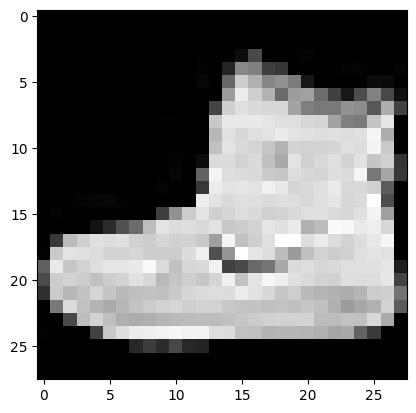

In [4]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[0], cmap="gray") # recordad que siempre es preferible trabajar en blanco y negro

print(training_labels[0])
print(training_images[0])

Habréis notado que todos los valores numericos están entre 0 y 255. Si estamos entrenando una red neuronal, una buena practica es transformar todos los valores entre 0 y 1, un proceso llamado "normalización" y afortunadamente en Python es fácil normalizar una lista. Lo puedes hacer de esta manera:

In [5]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

## 1. Información sobre el dataset

Una vez tenemos los datos cargados en memoria, vamos a obtener información sobre los mismos.

**Pregunta 1.1 *(0.25 puntos)*** ¿Cuántas imágenes hay de *training* y de *test*? ¿Qué tamaño tienen las imágenes?

In [6]:
print("* Número de imágenes de training que existen: {}.".format(len(training_images)))
print("* Número de imágenes de test que existen: {}.".format(len(test_images)))
print("* El tamaño de las imágenes es {}x{}.".format(training_images[0].shape[0], training_images[0].shape[0]))

* Número de imágenes de training que existen: 60000.
* Número de imágenes de test que existen: 10000.
* El tamaño de las imágenes es 28x28.


Se ha usado las variables training_images y test_images que son las variables que representan las imágenes que se usarán para ajustar y evaluar el modelo de red neuronal. Las variables training_images y test_images son arrays tridimensionales <x,y,z> que contienen en la primera posición (x) la imagen asociada a los pixeles en la segunda y tercera posición (y,z). 

Sería similar a tener una lista de 60000 posiciones, donde cada elemento es un pixel en una matriz bidimensional de tamaño 28x28.

**Pregunta 1.2 *(0.25 puntos)*** Realizar una exploración de las variables que contienen los datos. Describir en qué consiste un example del dataset (qué información se guarda en cada imagen) y describir qué contiene la información en y.

<class 'numpy.ndarray'> (60000, 28, 28) (28, 28) 0.0
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


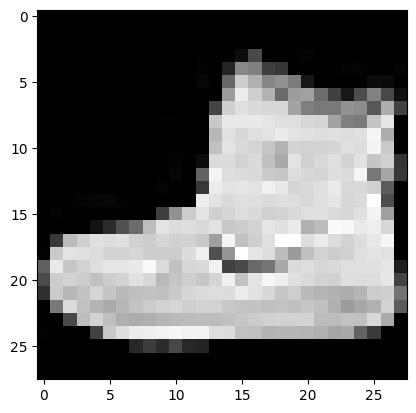

In [7]:
print(type(training_images), training_images.shape, training_images[0].shape, training_images[0,0,0])
print(list(set(training_labels)))
plt.imshow(training_images[0], cmap="gray") # recordad que siempre es preferible trabajar en blanco y negro

La respuesta es similar a la anterior. Aquí es importante agregar que la imagen está normalizada ya que nos dan la imagen en 8 bits de profundidad, yendo el valor de los píxeles entre 0 y 255. Por último, interpretamos y como el conjunto de test y las etiquetas asociadas a que imagen es, por lo que contiene lo mismo, es decir, un array tridimensional que en cada posición se guarda la imagen, y un array que relaciona la imagen con la etiqueta correspondiente por orden:

"T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt', "Sneaker", "Bap", "Ankle boot"

## 2. Creación del Modelo

Ahora vamos a definir el modelo, pero antes vamos a repasar algunos comandos y conceptos muy útiles:
* **Sequential**: Eso define una SECUENCIA de capas en la red neuronal
* **Dense**: Añade una capa de neuronas
* **Flatten**: ¿Recuerdas cómo eran las imágenes cuando las imprimiste para poder verlas? Un cuadrado, Flatten toma ese cuadrado y lo convierte en un vector de una dimensión.

Cada capa de neuronas necesita una función de activación. Normalmente se usa la función relu en las capas intermedias y softmax en la ultima capa (en problemas de clasificación de más de dos items)
* **Relu** significa que "Si X>0 devuelve X, si no, devuelve 0", así que lo que hace es pasar sólo valores 0 o mayores a la siguiente capa de la red.
* **Softmax** toma un conjunto de valores, y escoge el más grande.

 **Pregunta 2.1 (2 puntos)**. Utilizando Keras, y preparando los datos de X e y como fuera necesario, define y entrena una red neuronal que sea capaz de clasificar imágenes de Fashion MNIST con las siguientes características:

* Una hidden layer de tamaños 128, utilizando unidades sigmoid
Optimizador Adam.
* Durante el entrenamiento, la red tiene que mostrar resultados de loss y accuracy por cada epoch.
* La red debe entrenar durante 10 epochs y batch size de 64.
* La última capa debe de ser una capa softmax.
* Tu red tendría que ser capaz de superar fácilmente 80% de accuracy.

In [8]:
###########################################
# Parametros
###########################################

# Tamaño de cada imagen
sz_image = [28,28]

# Numero de neuronas en la capa oculta
sz_hid_layer = 128

# Funcion de activacion de la capa oculta
fun_hid_layer = "sigmoid"

# Funcion de optimizacion
opt = "Adam"

# Iteraciones del entrenamiento de la red neuronal
ep = 10

# Tamaño del lote
sz_batch = 64

# Funcion de activación en la salida
fun_output_layer = "softmax"

# Tipos distintos de tags que clasifican las imagenes
tags = len(list(set(training_labels)))

# Metricas
metr = ["accuracy"] 



###########################################
# Creacion del Modelo
###########################################

# Creamos el modelo de Red Neuronal secuencial
model = keras.models.Sequential()

# Creamos la capa de entrada
model.add(keras.layers.Flatten(input_shape = sz_image))

# Creamos una única capa oculta con 128 neuronas
model.add(keras.layers.Dense(sz_hid_layer, activation = fun_hid_layer))

# Creamos la capa de salida
model.add(keras.layers.Dense(tags, activation = fun_output_layer))

# Modificamos los parámetros del modelo
model.compile(loss="sparse_categorical_crossentropy", optimizer = opt, metrics = metr, steps_per_execution = sz_batch)



###########################################
# Ajuste del Modelo
###########################################

adj_model = model.fit(training_images, training_labels, epochs = ep, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5424 - accuracy: 0.8152 - val_loss: 0.4790 - val_accuracy: 0.8300
Epoch 2/10
1875/1875 [==============================] - 1s 561us/step - loss: 0.3913 - accuracy: 0.8587 - val_loss: 0.4177 - val_accuracy: 0.8542
Epoch 3/10
1875/1875 [==============================] - 1s 574us/step - loss: 0.3550 - accuracy: 0.8706 - val_loss: 0.3812 - val_accuracy: 0.8626
Epoch 4/10
1875/1875 [==============================] - 1s 562us/step - loss: 0.3320 - accuracy: 0.8792 - val_loss: 0.3636 - val_accuracy: 0.8683
Epoch 5/10
1875/1875 [==============================] - 1s 594us/step - loss: 0.3134 - accuracy: 0.8853 - val_loss: 0.3780 - val_accuracy: 0.8621
Epoch 6/10
1875/1875 [==============================] - 1s 583us/step - loss: 0.2975 - accuracy: 0.8914 - val_loss: 0.3561 - val_accuracy: 0.8720
Epoch 7/10
1875/1875 [==============================] - 1s 586us/step - loss: 0.2846 - accuracy: 0.8955 - val_loss: 0.3376 - v

Para concluir el entrenamiento de la red neuronal, una buena práctica es evaluar el modelo para ver si la precisión de entrenamiento es real

**pregunta 2.2 (0.5 puntos)**: Evalúa el modelo con las imágenes y etiquetas test.

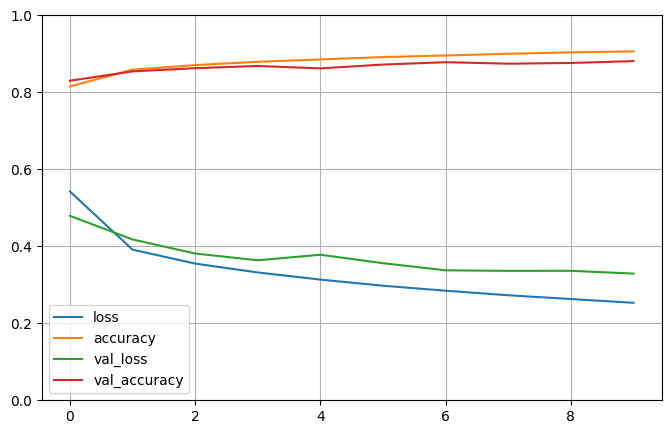

In [9]:
# Primero vemos como ha mejorado el modelo durante el entrenamiento
pd.DataFrame(adj_model.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

313/313 [==============================] - 0s 665us/step
La etiqueta de la imagen es: 4 y el algoritmo lo clasifica como: 6


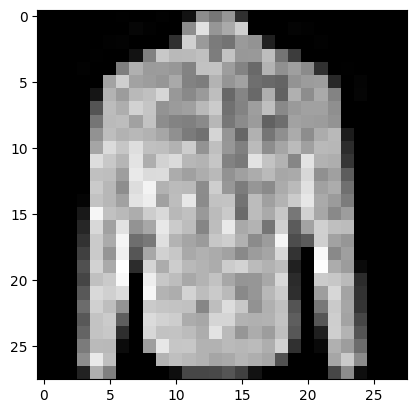

In [10]:
# Evaluamos el modelo según los valores test que nos proporcionan
model.evaluate(test_images, test_labels)

# Podemos probar aleatoriamente uno de las imagenes de los test y ver si se obtienen lo mismo
rd = int( np.random.randint(low=0, high=test_images.shape[0]-1, size=1, dtype=int) )

# Guardamos la prediccion de la etiqueta
tag_pr = model.predict(test_images)[rd].argmax()

print("=====================================================================")
print("La etiqueta de la imagen es: {} y el algoritmo lo clasifica como: {}".format(test_labels[rd], tag_pr))
plt.imshow(test_images[rd], cmap="gray") 


## 3: Funcionamiento de las predicción de la red neuronal



Ahora vamos a explorar el código con una serie de ejercicios para alcanzar un grado de comprensión mayor sobre las redes neuronales y su entrenamiento.

Sigue los siguientes pasos: 

* Crea una variable llamada **classifications** para construir un clasificador con las imágenes de prueba, para ello puedes utilizar la función predict sobre el conjunto de test
* Imprime con la función print la primera entrada en las clasificaciones. 

**pregunta 3.1 (0.25 puntos)**, el resultado al imprimirlo es un vector de números, 
* ¿Por qué crees que ocurre esto? ¿Qué representa este vector de números?

**pregunta 3.2 (0.25 puntos)**
* ¿Cúal es la clase de la primera entrada de la variable **classifications**? La respuesta puede ser un número o su etiqueta/clase equivalente.

In [11]:
classifications = model.predict(test_images)
print(classifications[0], classifications[0].argmax())

313/313 [==============================] - 0s 249us/step
[4.7505996e-06 7.1268097e-08 8.3327245e-07 1.1647826e-05 4.5787697e-06 1.3935639e-02 4.7228477e-05 2.2606285e-02 3.6410169e-05 9.6335256e-01] 9


<b>Respuesta a la pregunta 3.1:</b>
Lo que nos imprime son las salidas de las neuronas de output. Esto nos indica que valor es más probable que sea con respecto a la clase equivalente por orden.

<b>Respuesta a la pregunta 3.2:</b>
La clase nos la indica la posicion del elemento mayor del array. En este caso, el elemento que mayor valor tiene está localizado en la posición 9, por lo que la clase predicha es la 9.

## 4: Impacto variar el número de neuronas en las capas ocultas





En este ejercicio vamos a experimentar con nuestra red neuronal cambiando el numero de neuronas por 512 y por 1024. Para ello, utiliza la red neuronal de la pregunta 1, y en su capa oculta cambia las 128 neuronas por:

* **512 neuronas en la capa oculta
* **1024 neuronas en la capa oculta

Entrena la red en ambos casos.

In [16]:
###########################################
# Creacion del Modelo
###########################################

# Creamos el modelo de Red Neuronal secuencial
model2 = keras.models.Sequential()

# Creamos la capa de entrada
model2.add(keras.layers.Flatten(input_shape = sz_image))

# Creamos una única capa oculta con 512 neuronas
model2.add(keras.layers.Dense(512, activation = fun_hid_layer))

# Creamos la capa de salida
model2.add(keras.layers.Dense(tags, activation = fun_output_layer))

# Modificamos los parámetros del modelo
model2.compile(loss="sparse_categorical_crossentropy", optimizer = opt, metrics = metr, steps_per_execution = sz_batch)

###########################################
# Ajuste del Modelo
###########################################

adj_model2 = model2.fit(training_images, training_labels, epochs = ep, validation_data=(test_images, test_labels))

###########################################
# Evaluacion del Modelo
###########################################

print("============================================================")

# Evaluamos el modelo según los valores test que nos proporcionan
print("\nEl accuracy de este modelo al evaluarlo es: {} ".format(model2.evaluate(test_images, test_labels)[1]))

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5026 - accuracy: 0.8225 - val_loss: 0.4537 - val_accuracy: 0.8360
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3852 - accuracy: 0.8586 - val_loss: 0.4157 - val_accuracy: 0.8501
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3414 - accuracy: 0.8746 - val_loss: 0.3613 - val_accuracy: 0.8697
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3151 - accuracy: 0.8837 - val_loss: 0.3554 - val_accuracy: 0.8703
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2925 - accuracy: 0.8906 - val_loss: 0.3470 - val_accuracy: 0.8747
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2757 - accuracy: 0.8975 - val_loss: 0.3335 - val_accuracy: 0.8818
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2590 - accuracy: 0.9032 - val_loss: 0.3344 - val_accuracy:

In [17]:
###########################################
# Creacion del Modelo
###########################################

# Creamos el modelo de Red Neuronal secuencial
model3 = keras.models.Sequential()

# Creamos la capa de entrada
model3.add(keras.layers.Flatten(input_shape = sz_image))

# Creamos una única capa oculta con 1024 neuronas
model3.add(keras.layers.Dense(1024, activation = fun_hid_layer))

# Creamos la capa de salida
model3.add(keras.layers.Dense(tags, activation = fun_output_layer))

# Modificamos los parámetros del modelo
model3.compile(loss="sparse_categorical_crossentropy", optimizer = opt, metrics = metr, steps_per_execution = sz_batch)

###########################################
# Ajuste del Modelo
###########################################

adj_model3 = model3.fit(training_images, training_labels, epochs = ep, validation_data=(test_images, test_labels))

###########################################
# Evaluacion del Modelo
###########################################

print("============================================================")

# Evaluamos el modelo según los valores test que nos proporcionan
print("\nEl accuracy de este modelo al evaluarlo es: {} ".format(model3.evaluate(test_images, test_labels)[1]))

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5025 - accuracy: 0.8189 - val_loss: 0.4384 - val_accuracy: 0.8422
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3852 - accuracy: 0.8590 - val_loss: 0.3984 - val_accuracy: 0.8547
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3421 - accuracy: 0.8731 - val_loss: 0.3775 - val_accuracy: 0.8663
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3108 - accuracy: 0.8844 - val_loss: 0.3493 - val_accuracy: 0.8735
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2887 - accuracy: 0.8921 - val_loss: 0.3446 - val_accuracy: 0.8734
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2690 - accuracy: 0.8989 - val_loss: 0.3348 - val_accuracy: 0.8824
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2527 - accuracy: 0.9051 - val_loss: 0.3276 - val_ac

**pregunta 4.1 (0.5 puntos)**: ¿Cuál es el impacto que tiene la red neuronal? 

Pues los principales cambios serían:
* Aumento de tiempo por cada época.
* Aumento del accuracy y descenso de la función de perdida que mejora nuestra predicción, pero que puede llevar a un sobreajuste no deseado-

Si ahora entrenais el modelo de esta forma (con 512 y 1024 neuronas en la capa oculta) y volveis a ejecutar el predictor guardado en la variable **classifications**, escribir el código del clasificador del ejercicio 1 de nuevo e imprimid el primer objeto guardado en la variable classifications.

**pregunta 4.2 (0.25 puntos)**: 

* ¿En qué clase está clasificado ahora la primera prenda de vestir de la variable classifications?

**pregunta 4.3 (0.25 puntos)**: 

* ¿Por qué crees que ha ocurrido esto?

In [18]:
classifications2 = model2.predict(test_images)
classifications3 = model3.predict(test_images)

print("Clasificación del modelo de 128 neuronas: {}, del modelo de 512 neuronas: {} y del modelo de 1024 neuronas: {}".format(classifications[0].argmax(), classifications2[0].argmax(), classifications3[0].argmax()))

313/313 [==============================] - 0s 1ms/step
Clasificación del modelo de 128 neuronas: 9, del modelo de 512 neuronas: 9 y del modelo de 1024 neuronas: 9


<b>Respuesta a la pregunta 4.2:</b>
Suponiendo que la pregunta se refiere a la posicion 0 cuando se refiere al primer elemento, los tres modelos clasifican igual, es decir, la etiqueta 9.

<b>Respuesta a la pregunta 4.3:</b>
Porque se ha mejorado el accuracy en los modelos progresivamente añadiendo más neuronas conforme se ha añadido 

## 5: Capa Flatten




En este ejercicio vamos a ver que ocurre cuando quitamos la capa flatten, para ello, escribe la red neuronal de la pregunta 1 y no pongas la capa Flatten.

**pregunta 5 (0.5 puntos):** ¿Puedes explicar a qué se debe el error que da?

In [19]:
try:
        ###########################################
        # Creacion del Modelo
        ###########################################

        # Creamos el modelo de Red Neuronal secuencial
        model4 = keras.models.Sequential()

        # Creamos una única capa oculta con 128 neuronas
        model4.add(keras.layers.Dense(sz_hid_layer, activation = fun_hid_layer))

        # Creamos la capa de salida
        model4.add(keras.layers.Dense(tags, activation = fun_output_layer))

        # Modificamos los parámetros del modelo
        model4.compile(loss="sparse_categorical_crossentropy", optimizer = opt, metrics = metr, steps_per_execution = sz_batch)



        ###########################################
        # Ajuste del Modelo
        ###########################################

        adj_model4 = model4.fit(training_images, training_labels, epochs = ep, validation_data=(test_images, test_labels))
        
        ###########################################
        # Evaluacion del Modelo
        ###########################################

        print("============================================================")

        # Evaluamos el modelo según los valores test que nos proporcionan
        print("\nEl accuracy de este modelo al evaluarlo es: {} ".format(model4.evaluate(test_images, test_labels)[1]))
        
except:
        print("Error")

Epoch 1/10
Error


<b>Respuesta a la pregunta 5:</b>
El modelo lanza un error ya que no coincide los tamaños de la entrada con lo que se quiere conseguir ya que la funcion flatten convierte la entrada a un vector de 1x(28x28)

## 6: Número de neuronas de la capa de salida


Considerad la capa final, la de salida de la red neuronal de la pregunta 1.

**pregunta 6.1 (0.25 puntos)**: ¿Por qué son 10 las neuronas de la última capa?

**pregunta 6.2 (0.25 puntos)**: ¿Qué pasaría si tuvieras una cantidad diferente a 10? 

Por ejemplo, intenta entrenar la red con 5, para ello utiliza la red neuronal de la pregunta 1 y cambia a 5 el número de neuronas en la última capa.

In [20]:
try:
    
    ###########################################
    # Creacion del Modelo
    ###########################################

    # Creamos el modelo de Red Neuronal secuencial
    model5 = keras.models.Sequential()

    # Creamos la capa de entrada
    model5.add(keras.layers.Flatten(input_shape = sz_image))

    # Creamos una única capa oculta con 128 neuronas
    model5.add(keras.layers.Dense(sz_hid_layer, activation = fun_hid_layer))

    # Creamos la capa de salida
    model5.add(keras.layers.Dense(5, activation = fun_output_layer))

    # Modificamos los parámetros del modelo
    model5.compile(loss="sparse_categorical_crossentropy", optimizer = opt, metrics = metr, steps_per_execution = sz_batch)



    ###########################################
    # Ajuste del Modelo
    ###########################################

    adj_model5 = model5.fit(training_images, training_labels, epochs = ep, validation_data=(test_images, test_labels))
    
    ###########################################
    # Evaluacion del Modelo
    ###########################################

    print("============================================================")

    # Evaluamos el modelo según los valores test que nos proporcionan
    print("\nEl accuracy de este modelo al evaluarlo es: {} ".format(model5.evaluate(test_images, test_labels)[1]))
    
except:
    
    print("Error")

Epoch 1/10
Error


<b>Respuesta a la pregunta 6.1:</b>
El modelo tiene 10 neuronas de salida ya que existen 10 etiquetas distintas, por lo que cada neurona evalúa si la imagen se puede clasificar como la etiqueta que representa.

<b>Respuesta a la pregunta 6.2:</b> Como se puede observar, si cambiamos las neuronas de la capa de salida por 5, no sabe como clasificar 10 etiquetas en 5 neuronas, por lo que lanza un error.

## 7: Aumento de epoch y su efecto en la red neuronal


En este ejercicio vamos a ver el impacto de aumentar los epoch en el entrenamiento. Usando la red neuronal de la pregunta 1:

**pregunta 7.1 (0.15 puntos)**
* Intentad 15 epoch para su entrenamiento, probablemente obtendras un modelo con una pérdida mucho mejor que el que tiene 5.

**pregunta 7.2 (0.15 puntos)**
* Intenta ahora con 30 epoch para su entrenamiento, podrás ver que el valor de la pérdida deja de disminuir, y a veces aumenta.

**pregunta 7.3 (0.20 puntos)**
* ¿Por qué piensas que ocurre esto? Explica tu respuesta y da el nombre de este efecto si lo conoces.

In [21]:
###########################################
# Creacion del Modelo
###########################################

# Creamos el modelo de Red Neuronal secuencial
model6 = keras.models.Sequential()

# Creamos la capa de entrada
model6.add(keras.layers.Flatten(input_shape = sz_image))

# Creamos una única capa oculta con 128 neuronas
model6.add(keras.layers.Dense(sz_hid_layer, activation = fun_hid_layer))

# Creamos la capa de salida
model6.add(keras.layers.Dense(tags, activation = fun_output_layer))

# Modificamos los parámetros del modelo
model6.compile(loss="sparse_categorical_crossentropy", optimizer = opt, metrics = metr, steps_per_execution = sz_batch)



###########################################
# Ajuste del Modelo
###########################################

adj_model6 = model6.fit(training_images, training_labels, epochs = 15, validation_data=(test_images, test_labels))

###########################################
# Evaluacion del Modelo
###########################################

print("============================================================")

# Evaluamos el modelo según los valores test que nos proporcionan
print("\nEl accuracy de este modelo al evaluarlo es: {} ".format(model6.evaluate(test_images, test_labels)[1]))

Epoch 1/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5427 - accuracy: 0.8148 - val_loss: 0.4560 - val_accuracy: 0.8377
Epoch 2/15
1875/1875 [==============================] - 1s 652us/step - loss: 0.3912 - accuracy: 0.8592 - val_loss: 0.4106 - val_accuracy: 0.8526
Epoch 3/15
1875/1875 [==============================] - 1s 579us/step - loss: 0.3534 - accuracy: 0.8728 - val_loss: 0.3805 - val_accuracy: 0.8659
Epoch 4/15
1875/1875 [==============================] - 1s 651us/step - loss: 0.3294 - accuracy: 0.8809 - val_loss: 0.3706 - val_accuracy: 0.8677
Epoch 5/15
1875/1875 [==============================] - 1s 605us/step - loss: 0.3103 - accuracy: 0.8875 - val_loss: 0.3657 - val_accuracy: 0.8683
Epoch 6/15
1875/1875 [==============================] - 1s 576us/step - loss: 0.2957 - accuracy: 0.8921 - val_loss: 0.3527 - val_accuracy: 0.8730
Epoch 7/15
1875/1875 [==============================] - 1s 584us/step - loss: 0.2822 - accuracy: 0.8970 - val_loss: 0.3461 - v

In [22]:
###########################################
# Creacion del Modelo
###########################################

# Creamos el modelo de Red Neuronal secuencial
model7 = keras.models.Sequential()

# Creamos la capa de entrada
model7.add(keras.layers.Flatten(input_shape = sz_image))

# Creamos una única capa oculta con 128 neuronas
model7.add(keras.layers.Dense(sz_hid_layer, activation = fun_hid_layer))

# Creamos la capa de salida
model7.add(keras.layers.Dense(tags, activation = fun_output_layer))

# Modificamos los parámetros del modelo
model7.compile(loss="sparse_categorical_crossentropy", optimizer = opt, metrics = metr, steps_per_execution = sz_batch)



###########################################
# Ajuste del Modelo
###########################################

adj_model7 = model7.fit(training_images, training_labels, epochs = 30, validation_data=(test_images, test_labels))

###########################################
# Evaluacion del Modelo
###########################################

print("============================================================")

# Evaluamos el modelo según los valores test que nos proporcionan
print("\nEl accuracy de este modelo al evaluarlo es: {} ".format(model7.evaluate(test_images, test_labels)[1]))

Epoch 1/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5414 - accuracy: 0.8131 - val_loss: 0.4588 - val_accuracy: 0.8321
Epoch 2/30
1875/1875 [==============================] - 1s 601us/step - loss: 0.3934 - accuracy: 0.8575 - val_loss: 0.4034 - val_accuracy: 0.8536
Epoch 3/30
1875/1875 [==============================] - 1s 574us/step - loss: 0.3553 - accuracy: 0.8718 - val_loss: 0.3859 - val_accuracy: 0.8607
Epoch 4/30
1875/1875 [==============================] - 1s 585us/step - loss: 0.3305 - accuracy: 0.8791 - val_loss: 0.3720 - val_accuracy: 0.8639
Epoch 5/30
1875/1875 [==============================] - 1s 587us/step - loss: 0.3115 - accuracy: 0.8876 - val_loss: 0.3608 - val_accuracy: 0.8721
Epoch 6/30
1875/1875 [==============================] - 1s 613us/step - loss: 0.2975 - accuracy: 0.8915 - val_loss: 0.3612 - val_accuracy: 0.8680
Epoch 7/30
1875/1875 [==============================] - 1s 616us/step - loss: 0.2839 - accuracy: 0.8954 - val_loss: 0.3445 - v

<b>Respuesta a la pregunta 7.3:</b>
Una red neuronal con más épocas (iteraciones) es capaz de realizar más veces el proceso de back propagation y es capaz de corregir el error mejor que una que tiene menos épocas. Aunque en este caso, el aumentar las épocas estamos variando el loss y el accuracy llegando a un sobreentrenar la red dando peores resultados.

## 8: Early stop


En el ejercicio anterior, cuando entrenabas con epoch extras, tenías un problema en el que tu pérdida podía cambiar. Puede que te haya llevado un poco de tiempo esperar a que el entrenamiento lo hiciera,  y puede que hayas pensado "¿no estaría bien si pudiera parar el entrenamiento cuando alcance un valor deseado?", es decir, una precisión del 85% podría ser suficiente para ti, y si alcanzas eso después de 3 epoch, ¿por qué sentarte a esperar a que termine muchas más épocas? Como cualquier otro programa existen formas de parar la ejecución

A partir del código de ejemplo, hacer una nueva función que tenga en cuenta la perdida (loss) y que pueda parar el código para evitar que ocurra el efeto secundario que vimos en el ejercicio 5.

In [24]:
##### Ejemplo de código

class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')> 0.85):
              print("\nAlcanzado el 85% de precisión, se cancela el entrenamiento!!")
              self.model.stop_training = True

**Ejercicio 8 *(0.75 puntos)***: Completa el siguiente código con una clase callback que una vez alcanzado el 40% de perdida detenga el entrenamiento.

In [25]:
import tensorflow as tf
print(tf.__version__)

### Tu código de la función callback para parar el entrenamiento de la red neuronal al 40% de loss aqui: ###
class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss') <= 0.40):
              print("\nAlcanzado el 40% de loss, se cancela el entrenamiento!!")
              self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model8 = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model8.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']) 

model8.fit(training_images, training_labels, epochs=50, callbacks=[callbacks])

2.12.0
Epoch 1/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4707 - accuracy: 0.8319
Epoch 2/50
1871/1875 [============================>.] - ETA: 0s - loss: 0.3594 - accuracy: 0.8689
Alcanzado el 40% de loss, se cancela el entrenamiento!!
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3594 - accuracy: 0.8689


## 9. Unidades de activación

En este ejercicio, vamos a evaluar la importancia de utilizar las unidades de activación adecuadas. Como hemos visto en clase, funciones de activación como sigmoid han dejado de utilizarse en favor de otras unidades como ReLU.

**Ejercicio 9 *(0.75 puntos)***: Partiendo de una red sencilla como la desarrollada en el Trabajo 1, escribir un breve análisis comparando la utilización de unidades sigmoid y ReLU (por ejemplo, se pueden comentar aspectos como velocidad de convergencia, métricas obtenidas...). Explicar por qué pueden darse estas diferencias. Opcionalmente, comparar con otras activaciones disponibles en Keras.

*Pista: Usando redes más grandes se hace más sencillo apreciar las diferencias. Es mejor utilizar al menos 3 o 4 capas densas.*

In [26]:
###########################################
# Creacion del Modelo
###########################################

# Creamos el modelo de Red Neuronal secuencial
model9 = keras.models.Sequential()

# Creamos la capa de entrada
model9.add(keras.layers.Flatten(input_shape = sz_image))

# Creamos una única capa oculta con 1024 neuronas
model9.add(keras.layers.Dense(1024, activation = fun_hid_layer))

# Creamos una única capa oculta con 1024 neuronas
model9.add(keras.layers.Dense(1024, activation = fun_hid_layer))

# Creamos una única capa oculta con 1024 neuronas
model9.add(keras.layers.Dense(1024, activation = fun_hid_layer))

# Creamos la capa de salida
model9.add(keras.layers.Dense(tags, activation = fun_output_layer))

# Modificamos los parámetros del modelo
model9.compile(loss="sparse_categorical_crossentropy", optimizer = opt, metrics = metr, steps_per_execution = sz_batch)



###########################################
# Ajuste del Modelo
###########################################

adj_model9 = model9.fit(training_images, training_labels, epochs = ep, validation_data=(test_images, test_labels))

###########################################
# Evaluacion del Modelo
###########################################

print("============================================================")

# Evaluamos el modelo según los valores test que nos proporcionan
print("\nEl accuracy de este modelo al evaluarlo es: {} ".format(model9.evaluate(test_images, test_labels)[1]))

Epoch 1/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.5658 - accuracy: 0.7942 - val_loss: 0.4240 - val_accuracy: 0.8468
Epoch 2/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.3816 - accuracy: 0.8614 - val_loss: 0.3959 - val_accuracy: 0.8547
Epoch 3/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.3374 - accuracy: 0.8754 - val_loss: 0.3591 - val_accuracy: 0.8689
Epoch 4/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.3090 - accuracy: 0.8856 - val_loss: 0.3703 - val_accuracy: 0.8672
Epoch 5/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2877 - accuracy: 0.8933 - val_loss: 0.3535 - val_accuracy: 0.8711
Epoch 6/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2702 - accuracy: 0.8992 - val_loss: 0.3299 - val_accuracy: 0.8829
Epoch 7/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.2540 - accuracy: 0.9044 - val_loss: 0.3433 -

In [27]:
###########################################
# Creacion del Modelo
###########################################

# Creamos el modelo de Red Neuronal secuencial
model10 = keras.models.Sequential()

# Creamos la capa de entrada
model10.add(keras.layers.Flatten(input_shape = sz_image))

# Creamos una única capa oculta con 1024 neuronas
model10.add(keras.layers.Dense(1024, activation = "relu"))

# Creamos una única capa oculta con 1024 neuronas
model10.add(keras.layers.Dense(1024, activation = "relu"))

# Creamos una única capa oculta con 1024 neuronas
model10.add(keras.layers.Dense(1024, activation = "relu"))

# Creamos la capa de salida
model10.add(keras.layers.Dense(tags, activation = fun_output_layer))

# Modificamos los parámetros del modelo
model10.compile(loss="sparse_categorical_crossentropy", optimizer = opt, metrics = metr, steps_per_execution = sz_batch)



###########################################
# Ajuste del Modelo
###########################################

adj_model10 = model10.fit(training_images, training_labels, epochs = ep, validation_data=(test_images, test_labels))

###########################################
# Evaluacion del Modelo
###########################################

print("============================================================")

# Evaluamos el modelo según los valores test que nos proporcionan
print("\nEl accuracy de este modelo al evaluarlo es: {} ".format(model10.evaluate(test_images, test_labels)[1]))

Epoch 1/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.4889 - accuracy: 0.8231 - val_loss: 0.4389 - val_accuracy: 0.8440
Epoch 2/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.3701 - accuracy: 0.8646 - val_loss: 0.4115 - val_accuracy: 0.8477
Epoch 3/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.3328 - accuracy: 0.8788 - val_loss: 0.3716 - val_accuracy: 0.8631
Epoch 4/10
1875/1875 [==============================] - 38s 21ms/step - loss: 0.3077 - accuracy: 0.8863 - val_loss: 0.3621 - val_accuracy: 0.8754
Epoch 5/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2894 - accuracy: 0.8925 - val_loss: 0.3668 - val_accuracy: 0.8759
Epoch 6/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.2745 - accuracy: 0.8973 - val_loss: 0.3343 - val_accuracy: 0.8834
Epoch 7/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.2607 - accuracy: 0.9024 - val_loss: 0.3550 -

<b>Respuesta a la pregunta 9:</b>

- La función sigmoid es: $$ f(x) = { e^x \over e^x + 1} $$

- La función reLU es: $$ g(x) = max(0,x) $$

Concretamente, hay dos principales diferencias:

* La función reLU es objetivamente más sencilla de computar, mientras que la sigmoide es menos sencilla por el número de operaciones que realizan. Esto se ve en los segundos de computación de cada época. 

* El accuracy con la función reLU es menor que con la función sigmoide. Esto puede haberse dado porque la función sigmoide escala (encuentra patrones) de forma más suave/lenta que la la reLU. Se refleja en las tasas de pérdida donde una decrementa exponencialmente, mientras que la otra decrementa de forma lineal.

## 10. Inicialización de parámetros

En este ejercicio, vamos a evaluar la importancia de una correcta inicialización de parámetros en una red neuronal.

**Ejercicio 10 *(0.75 puntos)***: Partiendo de una red similar a la del ejercicio anterior (usando ya ReLUs), comentar las diferencias que se aprecian en el entrenamiento al utilizar distintas estrategias de inicialización de parámetros. Para ello, inicializar todas las capas con las siguientes estrategias, disponibles en Keras, y analizar sus diferencias:

* Inicialización con ceros.
* Inicialización con una variable aleatoria normal.
* Inicialización con los valores por defecto de Keras para una capa Dense (estrategia *glorot uniform*)

In [31]:
###########################################
# Creacion del Modelo
###########################################

# Creamos el modelo de Red Neuronal secuencial
model11 = keras.models.Sequential()

# Creamos la capa de entrada
model11.add(keras.layers.Flatten(input_shape = sz_image))

# Creamos una única capa oculta con 1024 neuronas
model11.add(keras.layers.Dense(1024, activation = "relu", kernel_initializer=initializers.Zeros()))

# Creamos una única capa oculta con 1024 neuronas
model11.add(keras.layers.Dense(1024, activation = "relu", kernel_initializer=initializers.Zeros()))

# Creamos una única capa oculta con 1024 neuronas
model11.add(keras.layers.Dense(1024, activation = "relu", kernel_initializer=initializers.Zeros()))

# Creamos la capa de salida
model11.add(keras.layers.Dense(tags, activation = fun_output_layer, kernel_initializer=initializers.Zeros()))

# Modificamos los parámetros del modelo
model11.compile(loss="sparse_categorical_crossentropy", optimizer = opt, metrics = metr, steps_per_execution = sz_batch)



###########################################
# Ajuste del Modelo
###########################################

adj_model11 = model11.fit(training_images, training_labels, epochs = ep, validation_data=(test_images, test_labels))

###########################################
# Evaluacion del Modelo
###########################################

print("============================================================")

# Evaluamos el modelo según los valores test que nos proporcionan
print("\nEl accuracy de este modelo al evaluarlo es: {} ".format(model11.evaluate(test_images, test_labels)[1]))

Epoch 1/10
1875/1875 [==============================] - 41s 22ms/step - loss: 2.3027 - accuracy: 0.0983 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 38s 20ms/step - loss: 2.3028 - accuracy: 0.0996 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 38s 20ms/step - loss: 2.3028 - accuracy: 0.0982 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 41s 22ms/step - loss: 2.3028 - accuracy: 0.0994 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 41s 22ms/step - loss: 2.3028 - accuracy: 0.1001 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 42s 22ms/step - loss: 2.3028 - accuracy: 0.0972 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 39s 21ms/step - loss: 2.3028 - accuracy: 0.0972 - val_loss: 2.3026 -

In [32]:
###########################################
# Creacion del Modelo
###########################################

# Creamos el modelo de Red Neuronal secuencial
model12 = keras.models.Sequential()

# Creamos la capa de entrada
model12.add(keras.layers.Flatten(input_shape = sz_image))

# Creamos una única capa oculta con 1024 neuronas
model12.add(keras.layers.Dense(1024, activation = "relu", kernel_initializer=initializers.RandomNormal()))

# Creamos una única capa oculta con 1024 neuronas
model12.add(keras.layers.Dense(1024, activation = "relu", kernel_initializer=initializers.RandomNormal()))

# Creamos una única capa oculta con 1024 neuronas
model12.add(keras.layers.Dense(1024, activation = "relu", kernel_initializer=initializers.RandomNormal()))

# Creamos la capa de salida
model12.add(keras.layers.Dense(tags, activation = fun_output_layer, kernel_initializer=initializers.RandomNormal()))

# Modificamos los parámetros del modelo
model12.compile(loss="sparse_categorical_crossentropy", optimizer = opt, metrics = metr, steps_per_execution = sz_batch)



###########################################
# Ajuste del Modelo
###########################################

adj_model12 = model12.fit(training_images, training_labels, epochs = ep, validation_data=(test_images, test_labels))

###########################################
# Evaluacion del Modelo
###########################################

print("============================================================")

# Evaluamos el modelo según los valores test que nos proporcionan
print("\nEl accuracy de este modelo al evaluarlo es: {} ".format(model12.evaluate(test_images, test_labels)[1]))

Epoch 1/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.4803 - accuracy: 0.8254 - val_loss: 0.4283 - val_accuracy: 0.8475
Epoch 2/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.3677 - accuracy: 0.8652 - val_loss: 0.3809 - val_accuracy: 0.8607
Epoch 3/10
1875/1875 [==============================] - 40s 22ms/step - loss: 0.3319 - accuracy: 0.8780 - val_loss: 0.3949 - val_accuracy: 0.8549
Epoch 4/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.3072 - accuracy: 0.8861 - val_loss: 0.3682 - val_accuracy: 0.8685
Epoch 5/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2887 - accuracy: 0.8930 - val_loss: 0.3660 - val_accuracy: 0.8709
Epoch 6/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.2774 - accuracy: 0.8976 - val_loss: 0.3555 - val_accuracy: 0.8749
Epoch 7/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.2635 - accuracy: 0.9013 - val_loss: 0.3394 -

In [33]:
###########################################
# Creacion del Modelo
###########################################

# Creamos el modelo de Red Neuronal secuencial
model13 = keras.models.Sequential()

# Creamos la capa de entrada
model13.add(keras.layers.Flatten(input_shape = sz_image))

# Creamos una única capa oculta con 1024 neuronas
model13.add(keras.layers.Dense(1024, activation = "relu", kernel_initializer=initializers.GlorotUniform()))

# Creamos una única capa oculta con 1024 neuronas
model13.add(keras.layers.Dense(1024, activation = "relu", kernel_initializer=initializers.GlorotUniform()))

# Creamos una única capa oculta con 1024 neuronas
model13.add(keras.layers.Dense(1024, activation = "relu", kernel_initializer=initializers.GlorotUniform()))

# Creamos la capa de salida
model13.add(keras.layers.Dense(tags, activation = fun_output_layer, kernel_initializer=initializers.GlorotUniform()))

# Modificamos los parámetros del modelo
model13.compile(loss="sparse_categorical_crossentropy", optimizer = opt, metrics = metr, steps_per_execution = sz_batch)



###########################################
# Ajuste del Modelo
###########################################

adj_model13 = model13.fit(training_images, training_labels, epochs = ep, validation_data=(test_images, test_labels))

###########################################
# Evaluacion del Modelo
###########################################

print("============================================================")

# Evaluamos el modelo según los valores test que nos proporcionan
print("\nEl accuracy de este modelo al evaluarlo es: {} ".format(model13.evaluate(test_images, test_labels)[1]))

Epoch 1/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.4879 - accuracy: 0.8230 - val_loss: 0.4474 - val_accuracy: 0.8422
Epoch 2/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.3686 - accuracy: 0.8652 - val_loss: 0.3934 - val_accuracy: 0.8607
Epoch 3/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.3345 - accuracy: 0.8762 - val_loss: 0.3732 - val_accuracy: 0.8646
Epoch 4/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.3078 - accuracy: 0.8863 - val_loss: 0.3527 - val_accuracy: 0.8750
Epoch 5/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.2926 - accuracy: 0.8921 - val_loss: 0.3759 - val_accuracy: 0.8749
Epoch 6/10
1875/1875 [==============================] - 38s 21ms/step - loss: 0.2754 - accuracy: 0.8973 - val_loss: 0.3378 - val_accuracy: 0.8795
Epoch 7/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2677 - accuracy: 0.9003 - val_loss: 0.3395 -

<b>Respuesta a la pregunta 10:</b>
* La inicialización con ceros es pésima ya que la tasa de pérdida es muy grande y se mantiene constante, y el accuracy decrementa conforme va avanzando las épocas. Esto significa que no encuentra patrones porque la inicialización es muy mala.
* La inicialización con distribución normal y con distribución Glorot Uniforme son bastante mejor ya que el accuracy final es cercano al 90% en ambos casos. La diferencia es que una inicializa los pesos de manera uniforme, mientras que la otra trabaja con una distribución normal.

## 11. Optimizadores

**Ejercicio 11 *(0.75 puntos)***: Partiendo de una red similar a la del ejercicio anterior (utilizando la mejor estrategia de inicialización observada), comparar y analizar las diferencias que se observan  al entrenar con varios de los optimizadores vistos en clase, incluyendo SGD como optimizador básico (se puede explorar el espacio de hiperparámetros de cada optimizador, aunque para optimizadores más avanzados del estilo de adam y RMSprop es buena idea dejar los valores por defecto provistos por Keras).

In [36]:
###########################################
# Creacion del Modelo
###########################################

# Creamos el modelo de Red Neuronal secuencial
model14 = keras.models.Sequential()

# Creamos la capa de entrada
model14.add(keras.layers.Flatten(input_shape = sz_image))

# Creamos una única capa oculta con 1024 neuronas
model14.add(keras.layers.Dense(1024, activation = "relu", kernel_initializer=initializers.GlorotUniform()))

# Creamos una única capa oculta con 1024 neuronas
model14.add(keras.layers.Dense(1024, activation = "relu", kernel_initializer=initializers.GlorotUniform()))

# Creamos una única capa oculta con 1024 neuronas
model14.add(keras.layers.Dense(1024, activation = "relu", kernel_initializer=initializers.GlorotUniform()))

# Creamos la capa de salida
model14.add(keras.layers.Dense(tags, activation = fun_output_layer, kernel_initializer=initializers.GlorotUniform()))

# Modificamos los parámetros del modelo
model14.compile(loss="sparse_categorical_crossentropy", optimizer = "SGD", metrics = metr, steps_per_execution = sz_batch)



###########################################
# Ajuste del Modelo
###########################################

adj_model14 = model14.fit(training_images, training_labels, epochs = ep, validation_data=(test_images, test_labels))

###########################################
# Evaluacion del Modelo
###########################################

print("============================================================")

# Evaluamos el modelo según los valores test que nos proporcionan
print("\nEl accuracy de este modelo al evaluarlo es: {} ".format(model14.evaluate(test_images, test_labels)[1]))

Epoch 1/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.6672 - accuracy: 0.7764 - val_loss: 0.5073 - val_accuracy: 0.8205
Epoch 2/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.4525 - accuracy: 0.8401 - val_loss: 0.4443 - val_accuracy: 0.8400
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.4069 - accuracy: 0.8561 - val_loss: 0.4277 - val_accuracy: 0.8456
Epoch 4/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3771 - accuracy: 0.8651 - val_loss: 0.4272 - val_accuracy: 0.8407
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3549 - accuracy: 0.8739 - val_loss: 0.3794 - val_accuracy: 0.8662
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3370 - accuracy: 0.8788 - val_loss: 0.3789 - val_accuracy: 0.8627
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3217 - accuracy: 0.8852 - val_loss: 0.3744 - val_ac

In [37]:
###########################################
# Creacion del Modelo
###########################################

# Creamos el modelo de Red Neuronal secuencial
model15 = keras.models.Sequential()

# Creamos la capa de entrada
model15.add(keras.layers.Flatten(input_shape = sz_image))

# Creamos una única capa oculta con 1024 neuronas
model15.add(keras.layers.Dense(1024, activation = "relu", kernel_initializer=initializers.GlorotUniform()))

# Creamos una única capa oculta con 1024 neuronas
model15.add(keras.layers.Dense(1024, activation = "relu", kernel_initializer=initializers.GlorotUniform()))

# Creamos una única capa oculta con 1024 neuronas
model15.add(keras.layers.Dense(1024, activation = "relu", kernel_initializer=initializers.GlorotUniform()))

# Creamos la capa de salida
model15.add(keras.layers.Dense(tags, activation = fun_output_layer, kernel_initializer=initializers.GlorotUniform()))

# Modificamos los parámetros del modelo
model15.compile(loss="sparse_categorical_crossentropy", optimizer = "RMSprop", metrics = metr, steps_per_execution = sz_batch)



###########################################
# Ajuste del Modelo
###########################################

adj_model15 = model15.fit(training_images, training_labels, epochs = ep, validation_data=(test_images, test_labels))

###########################################
# Evaluacion del Modelo
###########################################

print("============================================================")

# Evaluamos el modelo según los valores test que nos proporcionan
print("\nEl accuracy de este modelo al evaluarlo es: {} ".format(model15.evaluate(test_images, test_labels)[1]))

Epoch 1/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.5360 - accuracy: 0.8059 - val_loss: 0.4957 - val_accuracy: 0.8493
Epoch 2/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.4190 - accuracy: 0.8538 - val_loss: 0.4352 - val_accuracy: 0.8527
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.4013 - accuracy: 0.8632 - val_loss: 0.3971 - val_accuracy: 0.8689
Epoch 4/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.3925 - accuracy: 0.8660 - val_loss: 0.4262 - val_accuracy: 0.8625
Epoch 5/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.3825 - accuracy: 0.8698 - val_loss: 0.5085 - val_accuracy: 0.8501
Epoch 6/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.3801 - accuracy: 0.8730 - val_loss: 0.5945 - val_accuracy: 0.8449
Epoch 7/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.3857 - accuracy: 0.8709 - val_loss: 0.4404 -

<b>Respuesta a la pregunta 11:</b>
- El optimizador Adam es el que mejor funciona de los tres, pero el que mayor tiempo tarda en cada época. Dicho optimizador se basa en la optimización del método de descenso del gradiente de forma estocástica mediante los momentos de primer y segundo orden.
- El optimizador SGD se basa en el método de descenso del gradiente común, por ese mismo motivo es el optimizador que menor tiempo tiempo por cada época.
- El optimizador RMSprop utiliza una optimización del método de descenso del gradiente basado en el algoritmo de RMSprop.

## 12. Regularización y red final 

**Ejercicio 12 *(1 punto)***: Entrenar una red final que sea capaz de obtener una accuracy en el validation set cercana al 90%. Para ello, combinar todo lo aprendido anteriormente y utilizar técnicas de regularización para evitar overfitting. Algunos de los elementos que pueden tenerse en cuenta son los siguientes.

* Número de capas y neuronas por capa
* Optimizadores y sus parámetros
* Batch size
* Unidades de activación
* Uso de capas dropout, regularización L2, regularización L1...
* Early stopping (se puede aplicar como un callback de Keras, o se puede ver un poco "a ojo" cuándo el modelo empieza a caer en overfitting y seleccionar el número de epochs necesarias)
* Batch normalization

Si los modelos entrenados anteriormente ya se acercaban al valor requerido de accuracy, probar distintas estrategias igualmente y comentar los resultados.

Explicar brevemente la estrategia seguida y los modelos probados para obtener el modelo final, que debe verse entrenado en este Notebook. No es necesario guardar el entrenamiento de todos los modelos que se han probado, es suficiente con explicar cómo se ha llegado al modelo final.

In [73]:
###########################################
# Investigacion
###########################################

ls_loss, ls_acc = [], []

x,y = model.evaluate(test_images, test_labels)
ls_loss.append(x)
ls_acc.append(y)

x,y = model2.evaluate(test_images, test_labels)
ls_loss.append(x)
ls_acc.append(y)

x,y = model3.evaluate(test_images, test_labels)
ls_loss.append(x)
ls_acc.append(y)

ls_loss.append(0)
ls_acc.append(0)

ls_loss.append(0)
ls_acc.append(0)

x,y = model6.evaluate(test_images, test_labels)
ls_loss.append(x)
ls_acc.append(y)

x,y = model7.evaluate(test_images, test_labels)
ls_loss.append(x)
ls_acc.append(y)

x,y = model8.evaluate(test_images, test_labels)
ls_loss.append(x)
ls_acc.append(y)

x,y = model9.evaluate(test_images, test_labels)
ls_loss.append(x)
ls_acc.append(y)

x,y = model10.evaluate(test_images, test_labels)
ls_loss.append(x)
ls_acc.append(y)

x,y = model11.evaluate(test_images, test_labels)
ls_loss.append(x)
ls_acc.append(y)

x,y = model12.evaluate(test_images, test_labels)
ls_loss.append(x)
ls_acc.append(y)

x,y = model13.evaluate(test_images, test_labels)
ls_loss.append(x)
ls_acc.append(y)

x,y = model14.evaluate(test_images, test_labels)
ls_loss.append(x)
ls_acc.append(y)

x,y = model15.evaluate(test_images, test_labels)
ls_loss.append(x)
ls_acc.append(y)   

313/313 [==============================] - 1s 3ms/step - loss: 0.4555 - accuracy: 0.8627


In [74]:
model_table = pd.DataFrame({"Loss": ls_loss, "Accuracy": ls_acc}, index = ["model", "model2", "model3", "model4", "model5", "model6", "model7", "model8", "model9", "model10", "model11", "model12", "model13", "model14", "model15"])
display(model_table)

,Loss,Accuracy
model,0.329032,0.8810
model2,0.327065,0.8850
model3,0.316116,0.8919
model4,0.000000,0.0000
model5,0.000000,0.0000
model6,0.323021,0.8872
model7,0.338702,0.8861
model8,0.407391,0.8549
model9,0.350058,0.8797
model10,0.380771,0.8768


In [83]:
###########################################
# Creacion del Modelo
###########################################

_seed = 528

# Creamos el modelo de Red Neuronal secuencial
model16 = keras.models.Sequential()

# Creamos la capa de entrada
model16.add(keras.layers.Flatten(input_shape = sz_image))

# Creamos una única capa oculta con 1024 neuronas
model16.add(keras.layers.Dense(1024, activation = fun_hid_layer, kernel_initializer=initializers.GlorotUniform(seed=_seed)))

# Creamos una única capa oculta con 1024 neuronas
model16.add(keras.layers.Dense(1024, activation = fun_hid_layer, kernel_initializer=initializers.GlorotUniform(seed=_seed)))

# Creamos una única capa oculta con 1024 neuronas
model16.add(keras.layers.Dense(1024, activation = fun_hid_layer, kernel_initializer=initializers.GlorotUniform(seed=_seed)))

# Creamos la capa de salida
model16.add(keras.layers.Dense(tags, activation = fun_output_layer, kernel_initializer=initializers.GlorotUniform(seed=_seed)))

# Modificamos los parámetros del modelo
model16.compile(loss="sparse_categorical_crossentropy", optimizer = "Adam", metrics = metr, steps_per_execution = sz_batch)



###########################################
# Ajuste del Modelo
###########################################

adj_model16 = model16.fit(training_images, training_labels, epochs = 10, validation_data=(test_images, test_labels))

###########################################
# Evaluacion del Modelo
###########################################

print("============================================================")

# Evaluamos el modelo según los valores test que nos proporcionan
print("\nEl accuracy de este modelo al evaluarlo es: {} ".format(model16.evaluate(test_images, test_labels)[1]))

Epoch 1/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.5633 - accuracy: 0.7927 - val_loss: 0.4082 - val_accuracy: 0.8525
Epoch 2/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.3826 - accuracy: 0.8602 - val_loss: 0.4033 - val_accuracy: 0.8544
Epoch 3/10
1875/1875 [==============================] - 37s 19ms/step - loss: 0.3367 - accuracy: 0.8766 - val_loss: 0.3868 - val_accuracy: 0.8596
Epoch 4/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.3098 - accuracy: 0.8850 - val_loss: 0.3423 - val_accuracy: 0.8774
Epoch 5/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2865 - accuracy: 0.8937 - val_loss: 0.3598 - val_accuracy: 0.8756
Epoch 6/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2697 - accuracy: 0.8984 - val_loss: 0.3374 - val_accuracy: 0.8815
Epoch 7/10
1875/1875 [==============================] - 37s 19ms/step - loss: 0.2533 - accuracy: 0.9042 - val_loss: 0.3658 -

<b>Respuesta a la pregunta 12:</b>
Para poder realizar una óptima red neuronal, he realizado primero un estudio comparando todos los modelos que se han ejecutado para saber de que modelo partir. Una vez realizado dicho estudio, he escogido el modelo 3 planteado en el código que contiene el modelo original con 1024 neuronas y una capa oculta.

Posteriormente, le he agregado dos capas ocultas más (para mejorar el rendimiento) y le he puesto el initializer Glorot Uniform (que, mediante comparación con los demás optimizadores, se ha escogido por su accuracy). Todo esto se ha ido probando con varios modelos hasta encontrar el mejor. El principal problema que se ha encontrado es el descontrol de la inicializacion al no probar con una seed fija, ya que con el mismo modelo se ha llegado a accuracy entre 0,88 y 0.92 en varias ejecuciones, por lo tanto, se ha ido probando al final seed fijas.